# Unsupervised Machine Learning II - Test Your Knowledge Solution

In [1]:
library(readxl)
library(factoextra)
library(FactoMineR)
library(tidyverse)
library(vegan)
library(ggrepel)
library(reshape2)
library(pheatmap)
library(ggsci)
suppressPackageStartupMessages(library(dendextend))

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
# Reading in file
cytokines_df = data.frame(read_excel("CytokineData_102920.xlsx", sheet = 2))

# Viewing data 
head(cytokines_df)

,Original_Identifier,Group,SubjectNo,SubjectID,Compartment,Protein,Conc,Conc_pslog2
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E_C_F_002,NS,1,NS_1,NELF,IFNg,17.642316,4.220509
2,E_C_F_002,NS,1,NS_1,NELF,IL10,2.873724,1.953721
3,E_C_F_002,NS,1,NS_1,NELF,IL12p70,1.625272,1.392467
4,E_C_F_002,NS,1,NS_1,NELF,IL13,36.117692,5.214035
5,E_C_F_002,NS,1,NS_1,NELF,IL1b,104.409217,6.719857
6,E_C_F_002,NS,1,NS_1,NELF,IL6,21.159536,4.469856


## Question 1: Determine the optimal number of *k*-means clusters of cytokines derived from the nasal epithelieum lining fluid of e-cigarette users.

In [3]:
# selecting NELF samples from ecig users
ecig_df = cytokines_df %>%
    filter(Group == "Ecig", Compartment == "NELF") 

head(ecig_df)

,Original_Identifier,Group,SubjectNo,SubjectID,Compartment,Protein,Conc,Conc_pslog2
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E_B_F_053,Ecig,28,Ecig_28,NELF,IFNg,1.2327398,1.1588152
2,E_B_F_053,Ecig,28,Ecig_28,NELF,IL10,0.5417934,0.6246094
3,E_B_F_053,Ecig,28,Ecig_28,NELF,IL12p70,3.6404802,2.2142741
4,E_B_F_053,Ecig,28,Ecig_28,NELF,IL13,11.1394299,3.6016288
5,E_B_F_053,Ecig,28,Ecig_28,NELF,IL1b,62.0491380,5.9784047
6,E_B_F_053,Ecig,28,Ecig_28,NELF,IL6,18.8312501,4.3097037


In [4]:
wider_ecig_df = reshape2::dcast(ecig_df, Protein ~ SubjectID, value.var = "Conc_pslog2") %>% 
  column_to_rownames("Protein")

head(wider_ecig_df)

,Ecig_28,Ecig_29,Ecig_30,Ecig_31,Ecig_32,Ecig_33,Ecig_34,Ecig_35,Ecig_36,Ecig_37,Ecig_38,Ecig_39,Ecig_40,Ecig_41,Ecig_42,Ecig_43,Ecig_44
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Eotaxin,5.9560099,4.2058548,5.2052463,6.5184629,6.448992,8.383602,7.606646,7.513484,5.9542872,5.6178538,8.305834,7.873573,7.820937,6.495279,6.247441,7.598287,6.197323
Eotaxin3,3.6792233,5.3205450,3.8344973,2.9720881,3.791780,10.206203,4.345157,3.173294,2.7339420,3.2885361,5.239509,5.389172,7.519071,5.216470,2.659909,6.938425,3.074016
Fractalkine,12.4890149,11.4450722,12.8679559,13.8325772,13.339796,13.101722,15.205843,13.508127,11.8065072,12.2707738,13.410326,14.269303,13.912916,12.127709,11.103226,11.887413,13.210056
I309,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.786099,0.000000,0.000000,2.547325,0.000000
IFNg,1.1588152,3.1505320,1.4115786,0.0000000,2.114378,3.690171,2.344551,3.594729,0.8305996,1.6781974,3.476850,4.038599,3.762679,3.777575,0.000000,4.004199,2.176177
IL10,0.6246094,0.6577914,0.4176175,0.2069089,1.195176,2.607343,0.773740,2.505931,1.4673188,0.7844336,1.915382,2.440282,2.103872,1.993043,0.372858,2.457847,1.121557


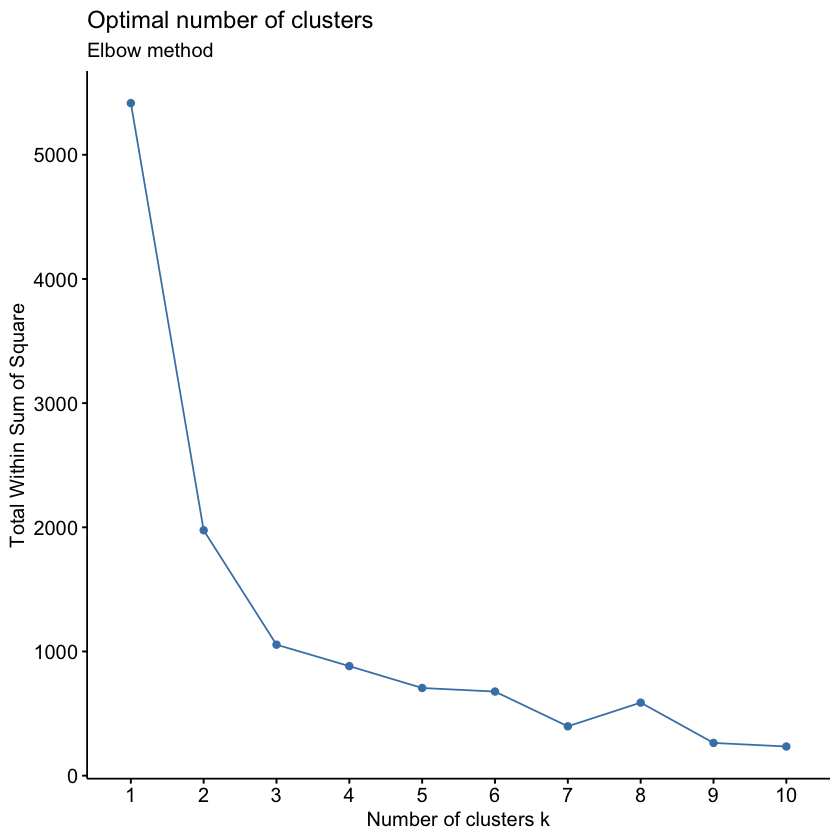

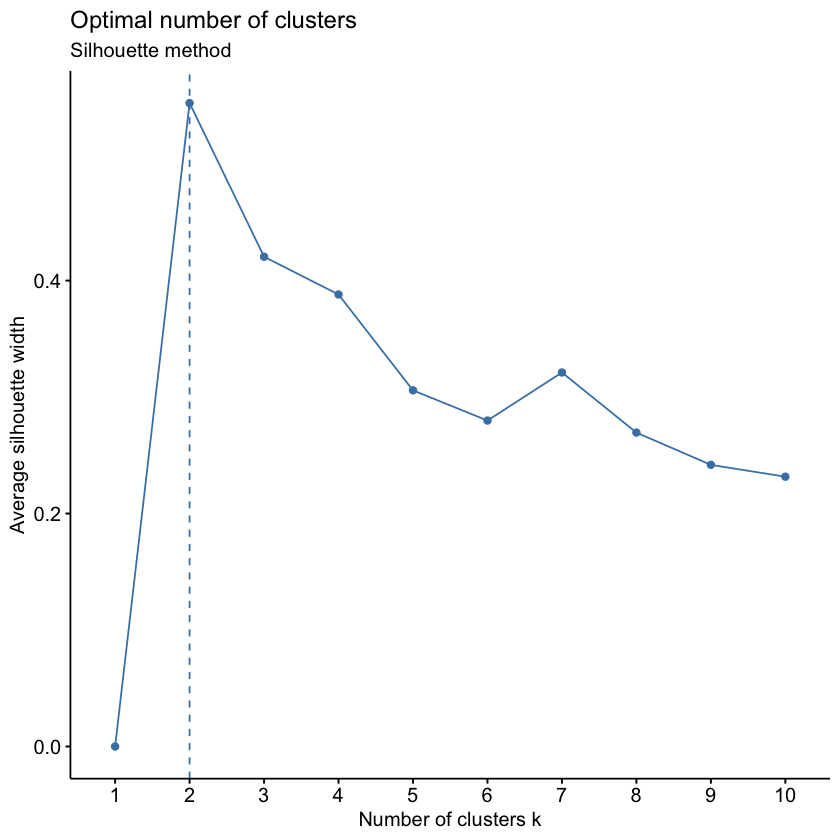

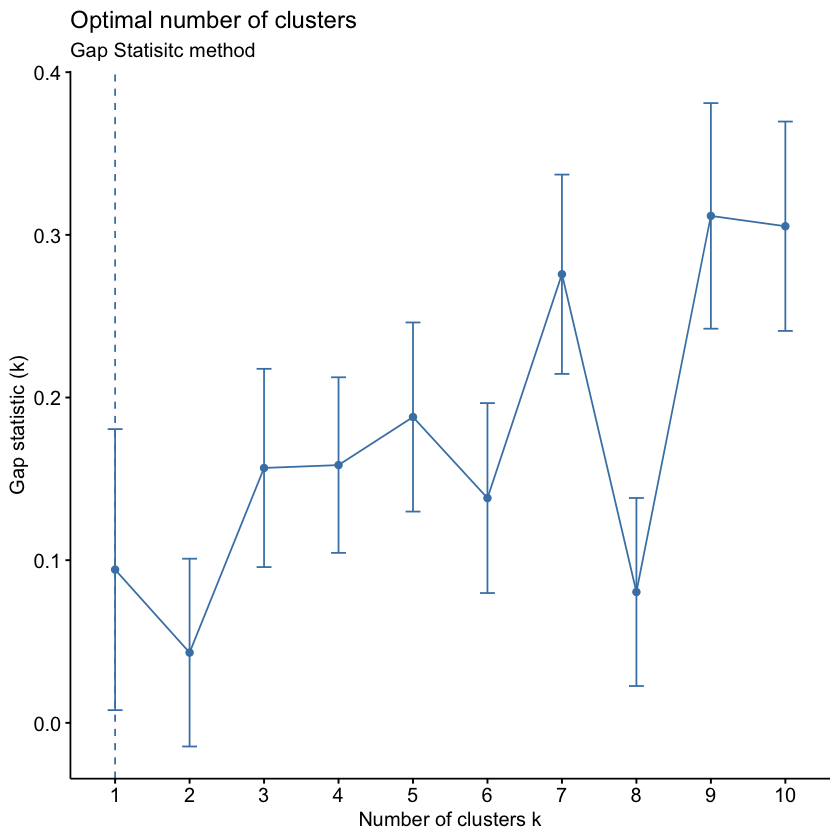

In [5]:
# Elbow method
fviz_nbclust(wider_ecig_df, kmeans, method = "wss") +
  labs(subtitle = "Elbow method") 

# Silhouette method
fviz_nbclust(wider_ecig_df, kmeans, method = "silhouette") + 
  labs(subtitle = "Silhouette method") 

# Gap statistic method
fviz_nbclust(wider_ecig_df, kmeans, method = "gap_stat") + 
  labs(subtitle = "Gap Statisitc method") 

The elbow method is suggesting 3 clusters, the silhouette method is suggesting 2, and the gap statistic method suggests 1. Since each of these methods is recommeding different *k* values, we can go ahead and run *k*-means to visualize the clusters and test those different *k*'s. 

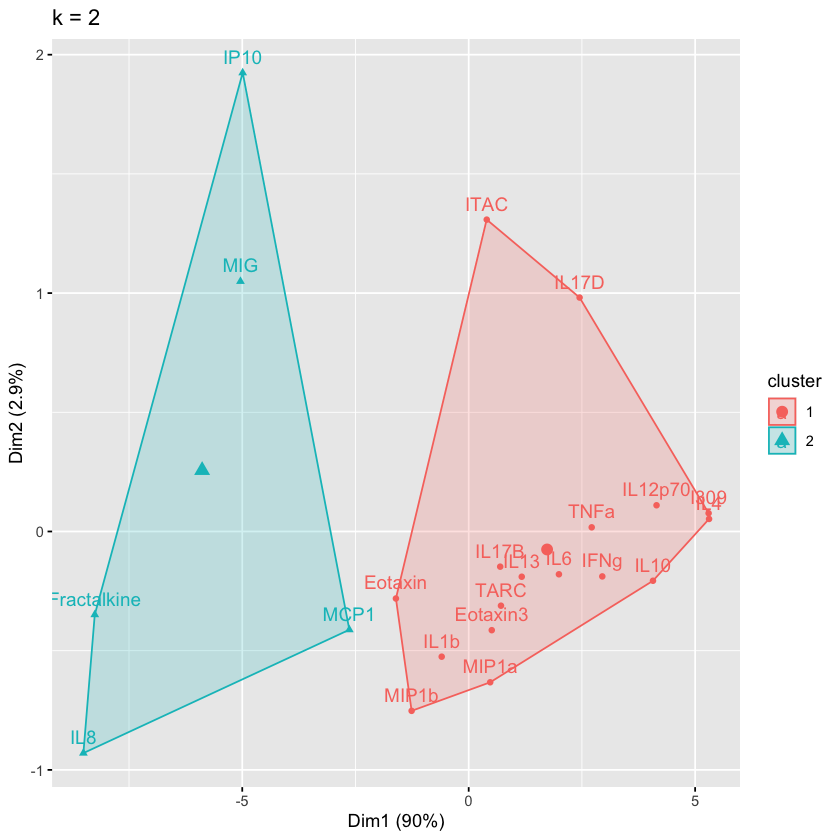

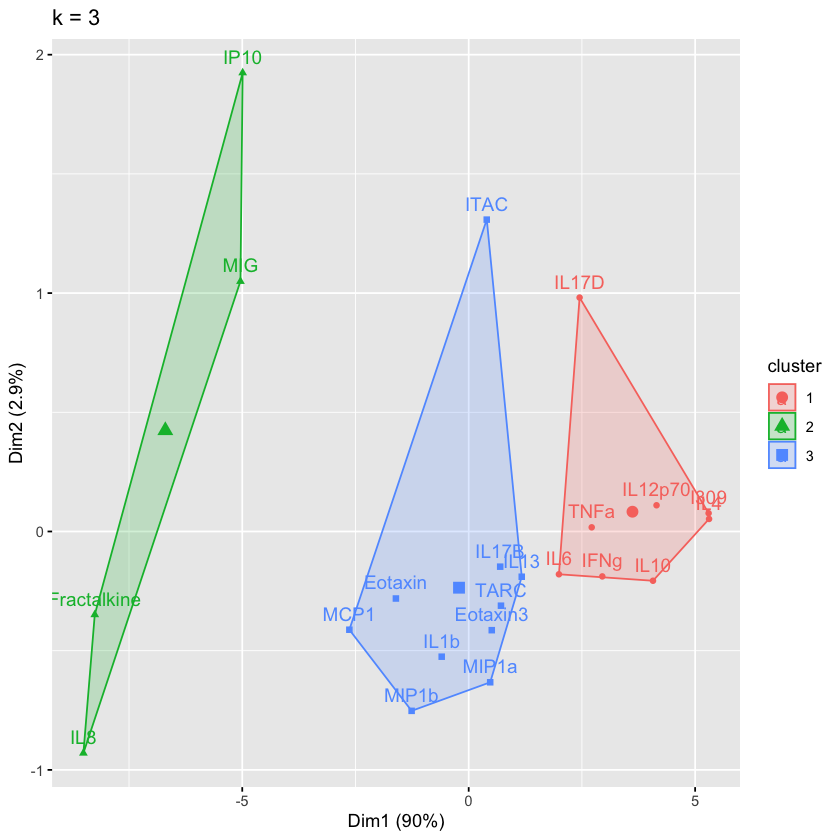

In [6]:
# Choosing to iterate through 2 or 3 clusters using i as our iterator
for (i in 2:3){
    # nstart = number of random starting partitions, it's recommended for nstart > 1
    cluster_k <- kmeans(wider_ecig_df, centers = i, nstart = 25)
    cluster_plot <- fviz_cluster(cluster_k, data = wider_ecig_df) + ggtitle(paste0("k = ", i))
    print(cluster_plot)
}

**Answer**: 2 or 3 clusters could be justified here, but we'll move forward with 3 clusters to more easily compare to the non-smoker clusters.

## Question 2: How do those clusters compare to the ones that were derived at baseline (in non-smokers)?

In [7]:
# getting cluster assignments
cluster_kmeans_3 <- kmeans(wider_ecig_df, centers = 3, nstart = 25)
cluster_kmeans_df <- data.frame(cluster_kmeans_3$cluster) %>%
    rownames_to_column("Cytokine") %>%
    rename(`K-Means Cluster` = cluster_kmeans_3.cluster) %>%
    # Ordering the dataframe for easier comparison
    arrange(`K-Means Cluster`)

cluster_kmeans_df

Cytokine,K-Means Cluster
<chr>,<int>
Eotaxin,1
Eotaxin3,1
IL13,1
IL17B,1
IL1b,1
ITAC,1
MCP1,1
MIP1a,1
MIP1b,1


**Answer**: All cytokines clustered together as they did in non-smoking subjects with the exception IL-6, which moved from cluster 1 to cluster 2.

## Question 3: Which cytokines have the greatest contributions to the first two eigenvectors?

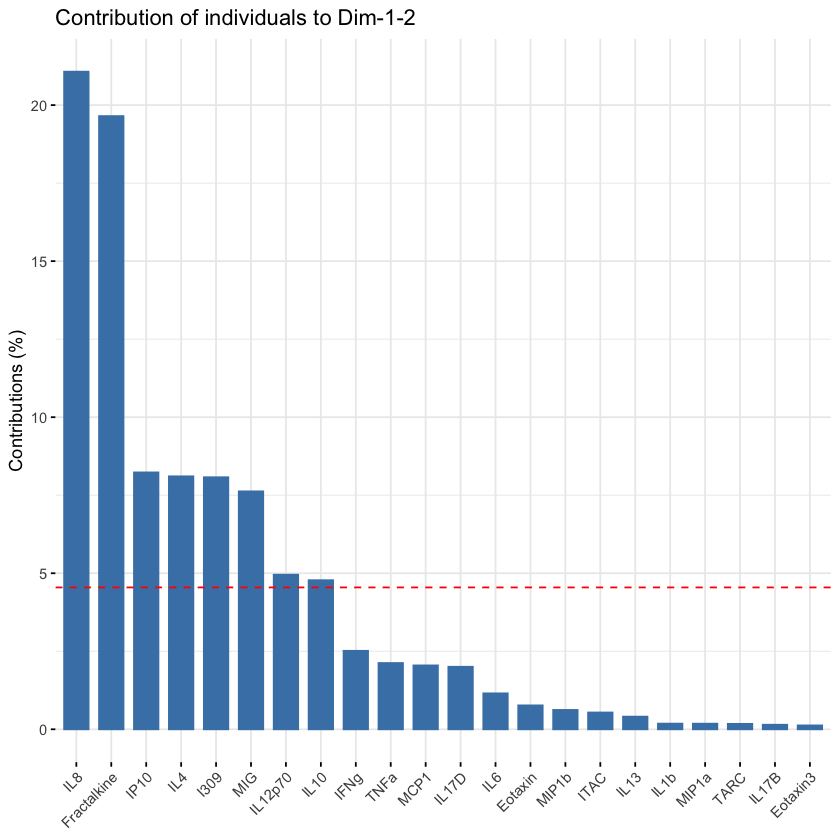

In [10]:
# First running PCA
pca_cytokine <- prcomp(wider_ecig_df, scale = TRUE, center = TRUE)

# kmeans contributions
fviz_contrib(pca_cytokine, 
             choice = "ind", 
             axes = 1:2) # specifies to show contribution percentages for first 2 PCs

**Answer**: The cytokines that have the greatest contributions to the first two principal components include IL-8, Fractalkine, IP-10, IL-4, MIG, I309, IL-12p70, and IL-10. 